In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random
# from random import randint
# import pickle
# %matplotlib inline

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)


In [2]:
# Logistic growth
# Lizard population on an island

# Parameters
K = 1000 # Carrying capacity
b = 20/10 # Birth rate: 5 eggs per lizard per year -> 50 eggs per lizard per lifetime (10 years)
d = 1/10 # Death rate : one lizard lives for 10 years
r = b-d # Growth rate

N0 = 100 # Initial population

t = np.linspace(0, 10, 100) # range for time
n = np.linspace(0, K, 100) # range for N

formats = ["pdf", "png"]
savepath = "figs/"

def dN_dt(N, t, r):
    return N*r(N)

def N_analytical(t, N0=N0, r=r, K=K):
    return (N0*K*np.exp(r*t))/(K+(N0*(np.exp(r*t)-1)))


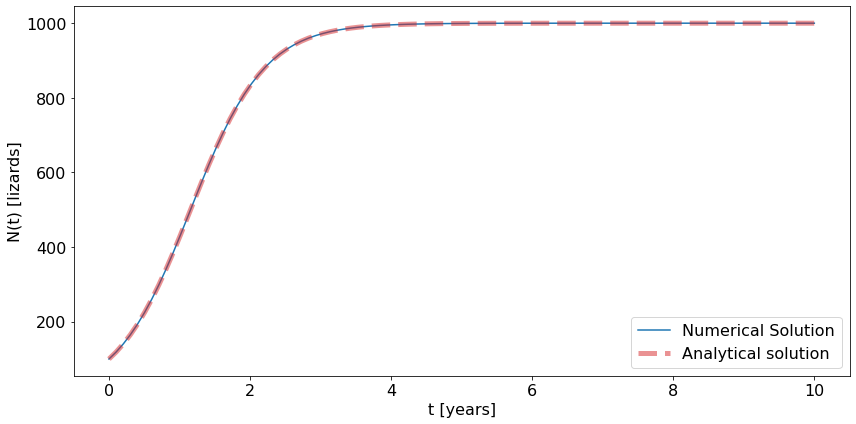

In [3]:
# -------- Simple logistic equation ---------

r_N = lambda N: r*(1 - N/K)

par = (r_N, )
ns = odeint(dN_dt, N0, t, args=par)

an = N_analytical(t)

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)

ax.plot(t, ns, color='tab:blue', label="Numerical Solution")
ax.plot(t, an, color='tab:red', linestyle="--", linewidth=5, alpha=0.5, label="Analytical solution")
# Maybe use this for clarity?:
# ax.axhline(K, color="tab:green", linestyle=":", label="Carrying capacity")

ax.set_xlabel("t [years]")
ax.set_ylabel("N(t) [lizards]")
ax.legend()

for e in formats:
    plt.savefig(savepath+"logistic_numerical_analytical."+e)
# plt.show()

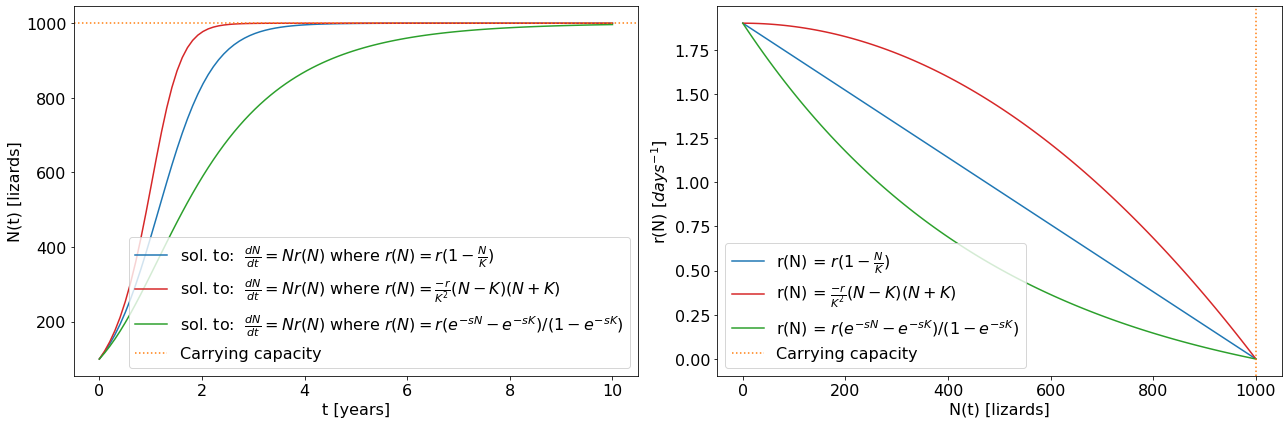

In [4]:
# -------- Simple logistic equation ---------
# do the same job as above, but with an arbitrary r(n) function

# These 3 functions define resp. linear, concave and convex growthrate dependency as funct. of population N:
r_lin = lambda N: r*(1 - N/K)
r_concave = lambda N: -r/(K**2)*(N-K)*(N+K)
s=0.002
r_convex = lambda N: r*(np.exp(-s*N)-np.exp(-s*K))/(1-np.exp(-s*K))

#these options are simply to make the automation of the plot a bit easier:
grs = [r_lin, r_concave, r_convex]
clr = [f"tab:{c}" for c in ["blue", "red", "green"]]
lbl = ["$r (1-\\frac{N}{K})$", "$\\frac{-r}{K^{2}}(N-K)(N+K)$", "$r(e^{-sN}-e^{-sK})/(1-e^{-sK})$"]
#lbl = ["linear", "concave", "convex"]
iterators = [grs, clr, lbl]

# Making a nice plot:
fig, ax = plt.subplots(1, 2, figsize=(18,6), tight_layout=True, gridspec_kw={'width_ratios':[1,1]})

for f, c, l in zip(*iterators):
    par = (f, )
    ns = odeint(dN_dt, N0, t, args=par)
    ax[0].plot(t, ns, color=c, label="sol. to:  $\\frac{dN}{dt} = N r(N)$ where $r(N)=$"+l)
    ax[1].plot(n, f(n), color=c, label="r(N) = "+l)
    
# Maybe use this for clarity?:
# ax.plot(t, an, color='tab:red', linestyle="--", linewidth=5, alpha=0.5, label="logistic growth (analytical)")

ax[0].axhline(K, color="tab:orange", linestyle=":", label="Carrying capacity")
ax[1].axvline(K, color="tab:orange", linestyle=":", label="Carrying capacity")

ax[0].set_xlabel("t [years]")
ax[0].set_ylabel("N(t) [lizards]")

ax[1].set_xlabel("N(t) [lizards]")
ax[1].set_ylabel("r(N) [$days^{-1}$]")

for a in ax:
    a.legend()

for e in formats:
    plt.savefig(savepath+"logistic_growthrates."+e)
# plt.show()

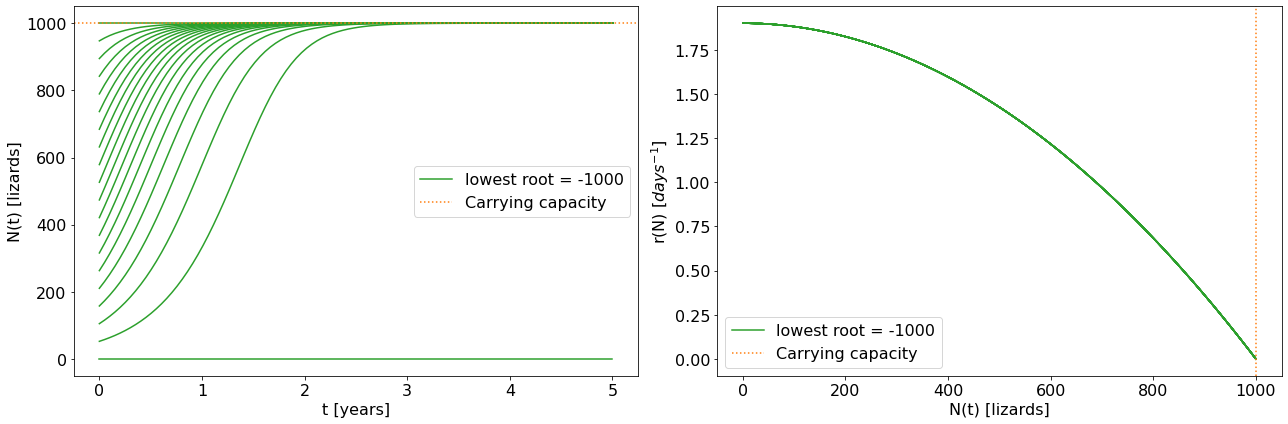

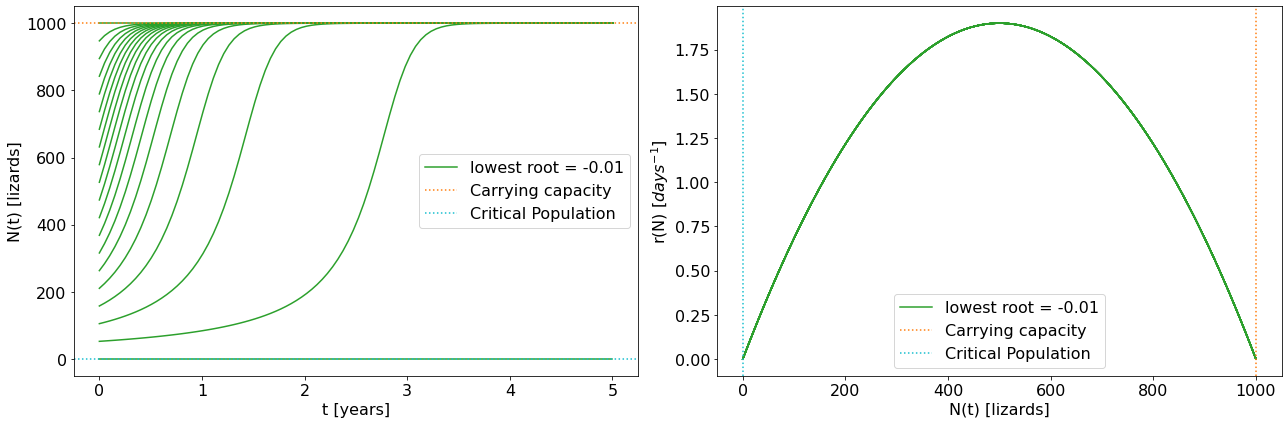

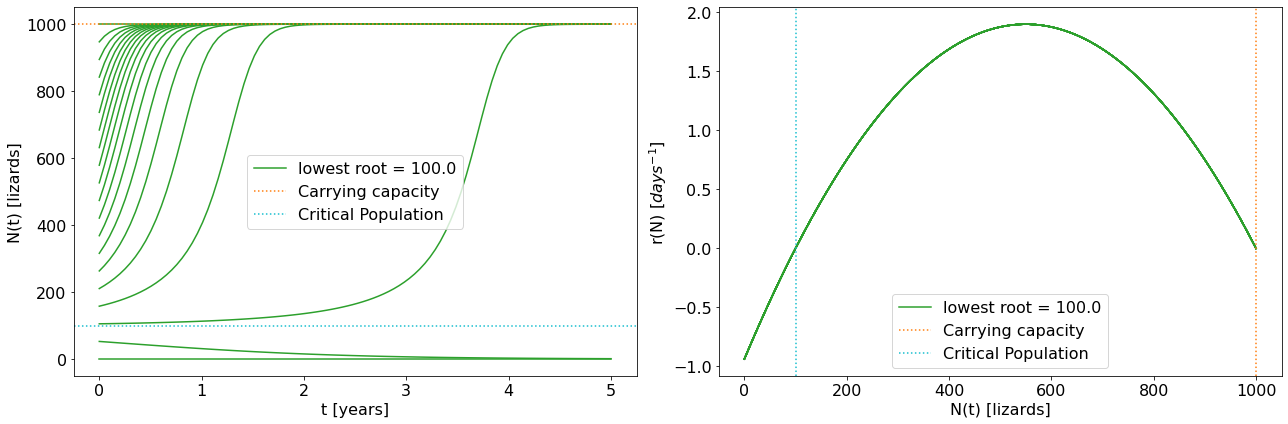

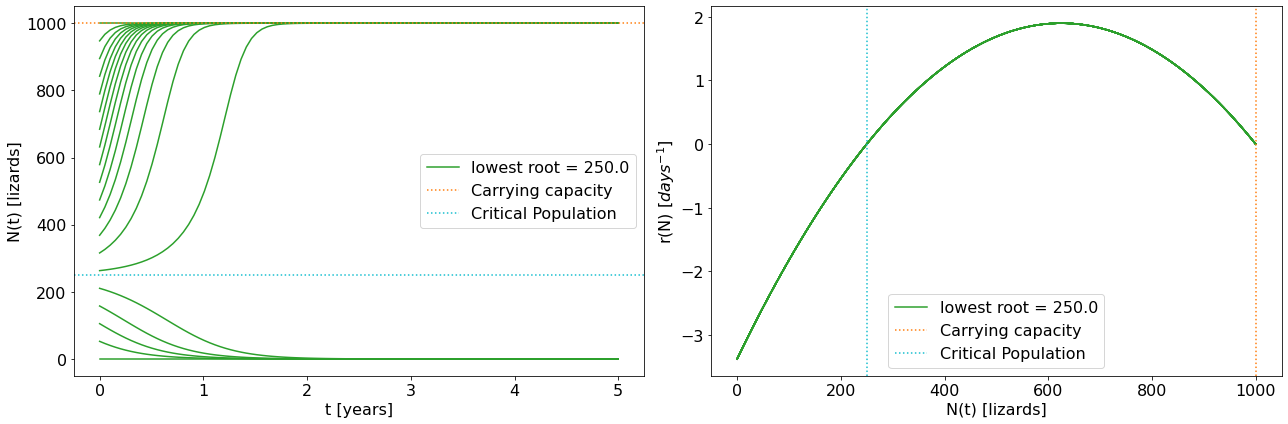

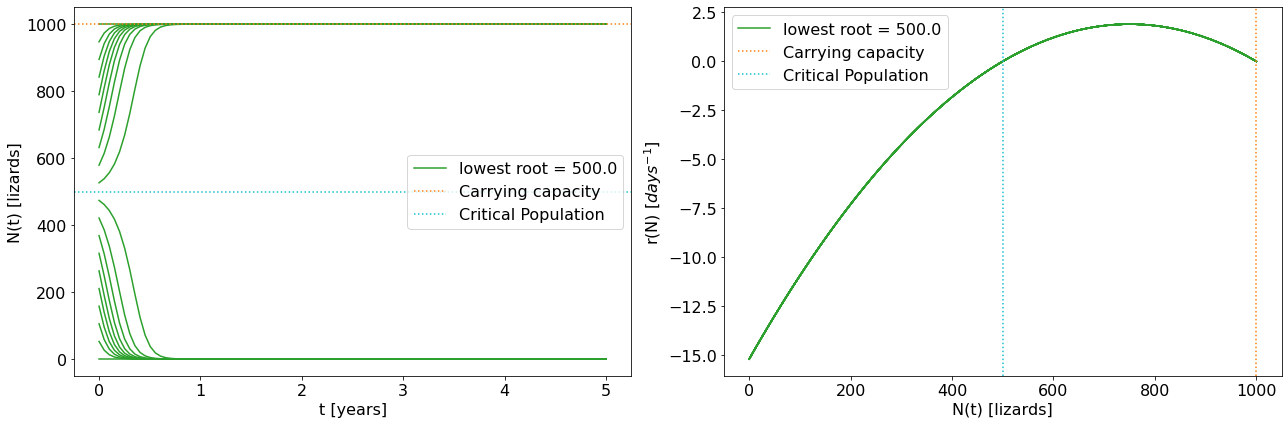

In [5]:
# -------- "Allee-effect" ---------

# this is done to investigate the "Allee"-effect for neggative growth rates below a critical population.
N0s = np.linspace(0, K, 20) # this defines the initial conditions for solutions

# These growthrate dependent as funct. of population N modelled as 2. order polyn:
r_polyn2 = lambda N, r1, r2: -((4*r)/((r1-r2)**2))*(N-r1)*(N-r2)

# this defines the roots for the 2. order plyn. 
# Note that the "Allee-effect" will only happen if thr root is positive
r1s = [-K, -0.01, K/10, K/4, K/2]

# Making a nice plot:
#fig, ax = plt.subplots(len(r1s), 2, figsize=(18,6), tight_layout=True, gridspec_kw={'width_ratios':[1,1]})
t = np.linspace(0, 5, 100) # range for time

for r1 in r1s:
    fig, ax = plt.subplots(1, 2, figsize=(18,6), tight_layout=True, gridspec_kw={'width_ratios':[1,1]})
    f = lambda N: r_polyn2(N, r1, K)
    l = f"lowest root = {r1}"
    par = (f, )
    for n0 in N0s:
        ns = odeint(dN_dt, n0, t, args=par)
        if n0 == N0s[0]:
            ax[0].plot(t, ns, color=c, label=l)
            ax[1].plot(n, f(n), color=c, label=l)
        else:
            ax[0].plot(t, ns, color=c)
            ax[1].plot(n, f(n), color=c)
    
    # ax.plot(t, an, color='tab:red', linestyle="--", linewidth=5, alpha=0.5, label="logistic growth (analytical)")
    # Maybe use this for clarity?:
    ax[0].axhline(K, color="tab:orange", linestyle=":", label="Carrying capacity")
    ax[1].axvline(K, color="tab:orange", linestyle=":", label="Carrying capacity")
    if r1 != r1s[0]:
            ax[0].axhline(r1, color="tab:cyan", linestyle=":", label="Critical Population")
            ax[1].axvline(r1, color="tab:cyan", linestyle=":", label="Critical Population")

    ax[0].set_xlabel("t [years]")
    ax[0].set_ylabel("N(t) [lizards]")

    ax[1].set_xlabel("N(t) [lizards]")
    ax[1].set_ylabel("r(N) [$days^{-1}$]")

    for a in ax:
        a.legend()
    
    for e in formats:
        plt.savefig(savepath+"logistic_allee_crit"+str(r1)+"."+e)
# plt.show()